In [1]:
# In[0]: IMPORTS
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import joblib

from emnist import list_datasets
list_datasets()
#['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']
#Classes:
#classes 0 -> 9: số 0 đến 9.
#10: A
#11: B
#12: c, C
#13: D
#14: E
#15: F
#16: G
#17: H
#18: i, I
#19: j, J
#20: k, K
#21: l, L
#22: m, M
#23: N 
#24: o, O
#25: p, P 
#26: Q
#27: R
#28: s, S
#29: T 
#30: u, U
#31: v, V 
#32: w, W 
#33: x, X
#34: y, Y 
#35: z, Z
#36: a
#37: b
#38: d
#39: e
#40: f 
#41: g
#42: h
#43: n
#44: q
#45: r
#46: t


['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

In [2]:
#Get train test.
from emnist import extract_training_samples
X_train, y_train = extract_training_samples('bymerge')

#Get test set.
from emnist import extract_test_samples
X_test, y_test = extract_test_samples('bymerge')

#In ra kiểm tra số lượng image train và test.
#X_train, X_test là samples, y_train, y_test là nhãn.
print("x_train shape:", X_train.shape, "y_train shape:", y_train.shape)
print("x_test shape:", X_test.shape, "y_test shape:", y_test.shape)

x_train shape: (697932, 28, 28) y_train shape: (697932,)
x_test shape: (116323, 28, 28) y_test shape: (116323,)


In [3]:
#Đổi matrix 28*28 pixel, thành một mảng 1 chiều 784 phần tử.
X_train = X_train.reshape(697932,784)
X_test = X_test.reshape(116323,784)

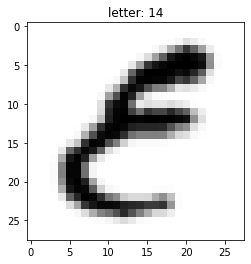

In [5]:
# 1.3. Plot a digit image
#Function để vẽ hình ra
#Chỉ cần đưa mảng 2 chiều của một hình, nó sẽ vẽ được hình hoàn chỉnh.
#Trước khi vẽ, cần kéo mảng 1 chiều thành mảng 2 chiều 28*28 pixel.
def plot_digit(data, label = 'unspecified'):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary)
    plt.title("letter: " + str(label))
    #plt.axis("off")
    plt.show()
sample_id = 10

#Vẽ một hình ở row thứ sample_id, truyền vào feature, và label. 
sample_id = 15
plot_digit(X_train[sample_id], y_train[sample_id])

In [4]:
#============================= RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
#Fit với data chưa được scale
if 0:
   rf_clf = rf_clf.fit(X_train, y_train)
   joblib.dump(rf_clf, 'saved_var/rf_clf')
else:
   rf_clf = joblib.load('saved_var/rf_clf')
print('học xong RandomForestClassifier')

if 0:
  y_probas_rf = cross_val_predict(rf_clf, X_train, y_train, cv=3, n_jobs=-1, method ="predict_proba")
  joblib.dump(y_probas_rf, 'saved_var/y_probas_forest')
else:
  y_probas_rf = joblib.load('saved_var/y_probas_forest')
print('xong predict_proba y_probas_rf')


học xong RandomForestClassifier
xong predict_proba y_probas_rf


In [8]:
from sklearn.model_selection import cross_val_score
if 0:
    rf_acc_before_scaling = cross_val_score(rf_clf, X_train, y_train, cv=3, n_jobs=-1, scoring="accuracy")
    joblib.dump(rf_acc_before_scaling,'saved_var/rf_acc_before_scaling')
else:
    rf_acc_before_scaling = joblib.load('saved_var/rf_acc_before_scaling')
print('Random forest accuraccy before scaling')
print(rf_acc_before_scaling)

Random forest accuraccy before scaling
[0.85740015 0.8575205  0.8580836 ]


In [9]:
from sklearn.preprocessing import StandardScaler
rf_clf_after_scale = RandomForestClassifier(n_estimators=100, random_state=42)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
# 7.1. SGDClassifier (benefited from feature scaling)
# Warning: takes time for new run! 

#Chạy lại RF, nhưng dữ liệu đầu vào đã được scale.

#Fit model

print('Bắt đầu fit với dữ liệu được scale')

if 0:
    rf_clf_after_scale = rf_clf_after_scale.fit(X_train_scaled, y_train)
    joblib.dump(rf_clf_after_scale, 'saved_var/rf_clf_after_scale')
else:
    rf_clf_after_scale = joblib.load('saved_var/rf_clf_after_scale')
print('học xong dữ liệu được scale')

Bắt đầu fit với dữ liệu được scale
học xong dữ liệu được scale


In [33]:
# Random forest accuraccy after scaling
from sklearn.model_selection import cross_val_score
if 0:
    rf_acc_after_scaling = cross_val_score(rf_clf_after_scale, X_train_scaled, y_train, cv=3, n_jobs=-1, scoring="accuracy")
    joblib.dump(rf_acc_after_scaling,'saved_var/rf_acc_after_scaling')
else:
    rf_acc_after_scaling = joblib.load('saved_var/rf_acc_after_scaling')
print('Random forest accuraccy after scaling')
print(rf_acc_after_scaling)

Random forest accuraccy after scaling
[       nan 0.85759358        nan]


In [10]:
# Random forest test set accuraccy
if 0:
   rf_acc_test_set = cross_val_score(rf_clf, X_test, y_test, cv=3, scoring="accuracy")
   joblib.dump(rf_acc_test_set,'saved_var/rf_acc_test_set')
else:
   rf_acc_test_set = joblib.load('saved_var/rf_acc_test_set')
print('Random forest test set accuraccy')
print(rf_acc_test_set)

Random forest test set accuraccy
[0.81972921 0.82021458 0.82127199]


In [4]:
if 0:
    train_score_before_scale = rf_clf.score(X_train, y_train)
    joblib.dump(train_score_before_scale,'saved_var/train_score_before_scale')
else:
    train_score_before_scale = joblib.load('saved_var/train_score_before_scale')
print('Train set Score:')
print(train_score_before_scale)

if 0:
    test_score_before_scale = rf_clf.score(X_test, y_test)
    joblib.dump(test_score_before_scale,'saved_var/test_score_before_scale')
else:
    test_score_before_scale = joblib.load('saved_var/test_score_before_scale')
print('Test set Score:')
print(test_score_before_scale)


Train set Score:
0.9999899703696062
Test set Score:
0.8626153039381722


In [17]:
### 5.1.2 Compute R2 score and root mean squared error
def r2score_and_rmse(model, train_data, labels): 
    r2score = model.score(train_data, labels)
    from sklearn.metrics import mean_squared_error
    prediction = model.predict(train_data)
    mse = mean_squared_error(labels, prediction)
    rmse = np.sqrt(mse)
    return r2score, rmse
print('Ok')

Ok


In [20]:
#Calculate on Train set

if 0:
    r2score, rmse = r2score_and_rmse(rf_clf, X_train, y_train)
    r2score_rmse =[r2score, rmse]
    joblib.dump(r2score_rmse,'saved_var/r2score_rmse')
else:
    r2score_rmse =  joblib.load('saved_var/r2score_rmse')
    r2score = r2score_rmse[0]
    rmse = r2score_rmse[1]

print('Calculate on Train set')
print('R2 score (on training data, best=1):', r2score)
print("Root Mean Square Error: ", rmse.round(decimals=1))
print('===========================================')

Calculate on Train set
R2 score (on training data, best=1): 0.9999899703696062
Root Mean Square Error:  0.0


In [21]:
#Calculate on Test set
if 0:
    r2score_test, rmse_test = r2score_and_rmse(rf_clf, X_test, y_test)
    r2score_rmse_test =[r2score_test, rmse_test]
    joblib.dump(r2score_rmse_test,'saved_var/r2score_rmse_test')
else:
    r2score_rmse_test =  joblib.load('saved_var/r2score_rmse_test')
    r2score_test = r2score_rmse_test[0]
    rmse_test = r2score_rmse_test[1]
print('Calculate on Test set')
print('R2 score (on testing data, best=1):', r2score_test)
print("Root Mean Square Error: ", rmse_test.round(decimals=1))
print('===========================================')

Calculate on Test set
R2 score (on testing data, best=1): 0.8626153039381722
Root Mean Square Error:  3.4


In [11]:
from sklearn import svm, metrics
f1_scoresprint("PREDICT & RESULT")

if 0:
    predict = rf_clf.predict(X_test_scaled)
    ac_score = metrics.accuracy_score(y_test, predict)
    cl_report = metrics.classification_report(y_test, predict)
    joblib.dump(predict, 'saved_var/predict')
    joblib.dump(ac_score, 'saved_var/ac_score')
    joblib.dump(cl_report, 'saved_var/cl_report')
else:
    predict = joblib.dump('saved_var/predict')
    ac_score = joblib.load('saved_var/ac_score')
    cl_report = joblib.load('saved_var/cl_report')

print("Score = ", ac_score)
print(cl_report)

PREDICT & RESULT
Score =  0.8626153039381722
              precision    recall  f1-score   support

           0       0.67      0.80      0.73      5745
           1       0.68      0.90      0.77      6400
           2       0.90      0.96      0.93      5765
           3       0.95      0.98      0.96      5827
           4       0.92      0.96      0.94      5498
           5       0.89      0.89      0.89      5326
           6       0.93      0.97      0.95      5787
           7       0.97      0.98      0.97      5873
           8       0.90      0.95      0.93      5655
           9       0.89      0.97      0.93      5651
          10       0.86      0.90      0.88      1058
          11       0.91      0.61      0.73       652
          12       0.92      0.92      0.92      2156
          13       0.88      0.65      0.75       735
          14       0.96      0.77      0.86       860
          15       0.77      0.86      0.81      1524
          16       0.92      0.63   

In [23]:
precisions = np.array([0.67, 0.68, 0.9, 0.95, 0.92, 0.89, 0.93, 0.97, 0.9, 0.89,0.86, 0.91, 0.92, 0.88, 0.96, 0.77, 0.92, 0.91, 0.68, 0.89, 0.91, 0.67, 0.95, 0.87, 0.69, 0.91, 0.88, 0.88, 0.85, 0.88, 0.91, 0.89, 0.96, 0.96, 0.88, 0.86, 0.85, 0.9, 0.93, 0.93, 0.67, 0.89, 0.922, 0.93, 0.9, 0.93, 0.89])
recalls = np.array([0.8, 0.9, 0.96, 0.98, 0.96, 0.89, 0.97, 0.98, 0.95, 0.97, 0.9, 0.61, 0.92, 0.65, 0.77, 0.86, 0.63, 0.77, 0.51, 0.83, 0.86, 0.38, 0.95, 0.93, 0.56, 0.93, 0.68, 0.81, 0.87, 0.9, 0.93, 0.88, 0.92, 0.9, 0.75, 0.62, 0.83, 0.77, 0.93, 0.97, 0.06, 0.18, 0.9, 0.93, 0.12, 0.94, 0.91])
f1_scores = np.array([0.73, 0.77, 0.93, 0.96, 0.94, 0.89, 0.95, 0.97, 0.93, 0.93, 0.88, 0.73, 0.92, 0.75, 0.86, 0.81, 0.75, 0.83, 0.58, 0.86, 0.89, 0.49, 0.95, 0.9, 0.62, 0.92, 0.77, 0.84, 0.86, 0.89, 0.92, 0.89, 0.94, 0.93, 0.81, 0.72, 0.84, 0.83, 0.93, 0.95, 0.1, 0.29, 0.91, 0.93, 0.21, 0.94, 0.9])

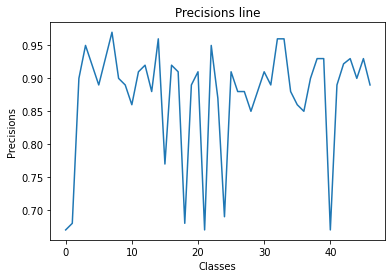

In [29]:
plt.plot(precisions)
plt.ylabel('Precisions')
plt.xlabel('Classes')
plt.title('Precisions line')
plt.show()

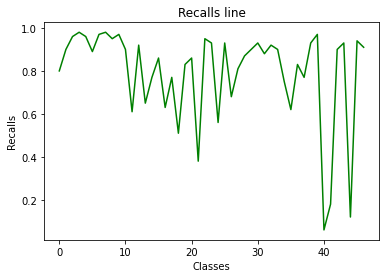

In [33]:
plt.plot(recalls, 'g')
plt.ylabel('Recalls')
plt.xlabel('Classes')
plt.title('Recalls line')
plt.show()

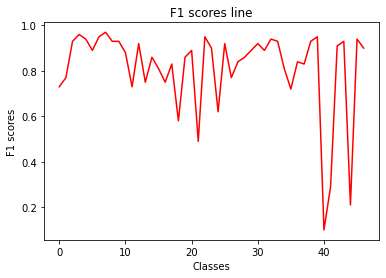

In [34]:
plt.plot(f1_scores, 'r')
plt.ylabel('F1 scores')
plt.xlabel('Classes')
plt.title('F1 scores line')
plt.show()

In [53]:
# [5] Try Predict
print("Random forest predict:")
sample_id = 155
print(rf_clf.predict([X_train[sample_id]]))

print("Actual result:")
y_train[sample_id]

Random forest predict:
[8]
Actual result:


8

In [ ]:
## In[6]: EVALUATE CLASSIFIERS
#from sklearn.model_selection import cross_val_score

## 6.2. RandomForestClassifier  
##Tính accuracy, dùng cross_val_score, chỉ định scoring = "accuracy"
## Warning: takes time for new run! 

#print('start calculate accuracy score...');
#if 0:
#    forest_acc = cross_val_score(rf_clf, X_train, y_train, cv=3, n_jobs=-1, scoring="accuracy")
#    joblib.dump(forest_acc,'saved_var/forest_acc')
#else:
#    forest_acc = joblib.load('saved_var/forest_acc')


#print('complete... this is result of Random forest:')
#print(forest_acc)
#none = 1


In [54]:
print(rf_clf.predict([X_train[1]]))

[36]


In [25]:
## In[6]: PRECISION AND RECALL
#Precision and recall
# Info: 
#   row: actual class, column: predicted class. 
#   negatives: class 0, positives: class 1

#   true positives, true negatives: CORRECT classifications
#   false positives, false negatives: INCORRECT classifications

if 0:
    y_train_pred_1 = []
    for i in range(0, 2000):
        if(rf_clf.predict([X_train[i]])== [1]):
            y_train_pred_1.append(1)
        else:
            y_train_pred_1.append(0)

    joblib.dump(y_train_pred_1,'saved_var/y_train_pred_1')
else:
    y_train_pred_1 = joblib.load('saved_var/y_train_pred_1')

print('Load y_train_pred_1 complete...')

#
if 0:
    y_test_pred_1 = []
    for i in range(0, 2000):
        if(rf_clf.predict([X_test[i]]) == [1]):
            y_test_pred_1.append(1)
        else:
            y_test_pred_1.append(0)

    joblib.dump(y_test_pred_1,'saved_var/y_test_pred_1')
else:
    y_test_pred_1 = joblib.load('saved_var/y_test_pred_1')

print('Load y_test_pred_1 complete...')

y_train_1 = []
for i in range(0, 2000):
    if y_train[i] == 1:
        y_train_1.append(1)
    else:
        y_train_1.append(0)

y_test_1 = []
for i in range(0, 2000):
    if y_test[i] == 1:
        y_test_1.append(1)
    else:
        y_test_1.append(0)

#   precision = TP/(TP + FP)
#   recall = TP/(TP + FN)
from sklearn.metrics import precision_score, recall_score

print('TRAIN SET')
precision_score_1 = precision_score(y_train_1, y_train_pred_1)
print(precision_score_1)
recall_score_1 = recall_score(y_train_1, y_train_pred_1)
print(recall_score_1)

print('TEST SET')
precision_score_1 = precision_score(y_test_1, y_test_pred_1)
print(precision_score_1)
recall_score_1 = recall_score(y_test_1, y_test_pred_1)
print(recall_score_1)



Load y_train_pred_1 complete...
Load y_test_pred_1 complete...
TRAIN SET
1.0
1.0
TEST SET
0.7402597402597403
0.9421487603305785


In [26]:
from sklearn.metrics import f1_score
if 1:
    test_score_after_scale = rf_clf_after_scale.score(X_test_scaled, y_test)
    joblib.dump(test_score_after_scale,'saved_var/test_score_after_scale')
else:
    test_score_after_scale = joblib.load('saved_var/test_score_after_scale')
f1_score_1 = f1_score(y_test_1, y_test_pred_1)
print(f1_score_1)


0.8290909090909091


In [5]:
# ERROR ANALYSIS
if 0:
    predict_rf_test = rf_clf.predict(X_test)
    joblib.dump(predict_rf_test,'saved_var/predict_rf_test')
else:
    predict_rf_test = joblib.load('saved_var/predict_rf_test')
print(predict_rf_test)

[ 0 22 28 ...  3  3  7]


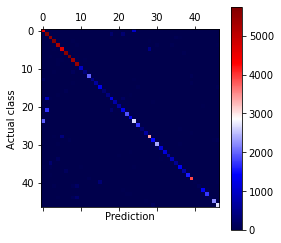

In [11]:
    ##Random forest
from sklearn.metrics import confusion_matrix  
conf_mat_rf = confusion_matrix(y_test, predict_rf_test) # row: actual class, col: prediction
let_plot = True;
if let_plot:
   plt.matshow(conf_mat_rf, cmap=plt.cm.seismic)
   plt.xlabel("Prediction")
   plt.ylabel("Actual class")
   plt.colorbar()
   #plt.savefig("figs/confusion_matrix_plot")
   plt.show()

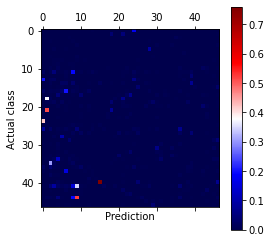

In [11]:
#Random forest
row_sums = conf_mat_rf.sum(axis=1, keepdims=True)
norm_conf_mat_rf = conf_mat_rf / row_sums
# Replace rates on diagonal (correct classifitions) by zeros    
if let_plot:
   np.fill_diagonal(norm_conf_mat_rf, 0)
   plt.matshow(norm_conf_mat_rf,cmap=plt.cm.seismic)
   plt.xlabel("Prediction")
   plt.ylabel("Actual class")
   plt.colorbar()
   #plt.savefig("figs/confusion_matrix_errors_plot", tight_layout=False)
   plt.show()

In [10]:
# 8.4. Plot examples of 3s and 5s
def plot_digits(instances, images_per_row=10, **options):
   size = 28
   images_per_row = min(len(instances), images_per_row)
   images = [instance.reshape(size,size) for instance in instances]
   n_rows = (len(instances) - 1) // images_per_row + 1
   row_images = []
   n_empty = n_rows * images_per_row - len(instances)
   images.append(np.zeros((size, size * n_empty)))
   for row in range(n_rows):
       rimages = images[row * images_per_row : (row + 1) * images_per_row]
       row_images.append(np.concatenate(rimages, axis=1))
   image = np.concatenate(row_images, axis=0)
   plt.imshow(image, cmap = mpl.cm.binary, **options)
   plt.axis("off")

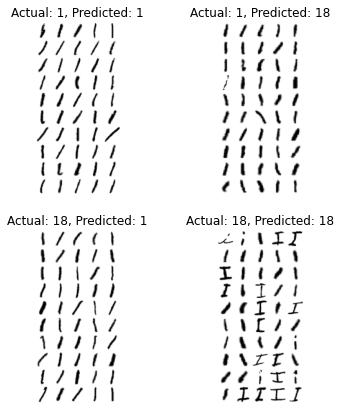

In [23]:
class_A = 1
class_B = 18
X_class_AA = X_test[(y_test == class_A) & (predict_rf_test == class_A)]
X_class_AB = X_test[(y_test == class_A) & (predict_rf_test == class_B)]
X_class_BA = X_test[(y_test == class_B) & (predict_rf_test == class_A)]
X_class_BB = X_test[(y_test == class_B) & (predict_rf_test == class_B)] 

if let_plot:
   plt.figure(figsize=(6,7))
   plt.subplot(221); plot_digits(X_class_AA[0:50], images_per_row=5)
   plt.title("Actual: " + str(class_A) + ", Predicted: " + str(class_A))
   plt.subplot(222); plot_digits(X_class_AB[0:50], images_per_row=5)
   plt.title("Actual: " + str(class_A) + ", Predicted: " + str(class_B))
   plt.subplot(223); plot_digits(X_class_BA[0:50], images_per_row=5)
   plt.title("Actual: " + str(class_B) + ", Predicted: " + str(class_A))
   plt.subplot(224); plot_digits(X_class_BB[0:50], images_per_row=5)
   plt.title("Actual: " + str(class_B) + ", Predicted: " + str(class_B))
   plt.show()


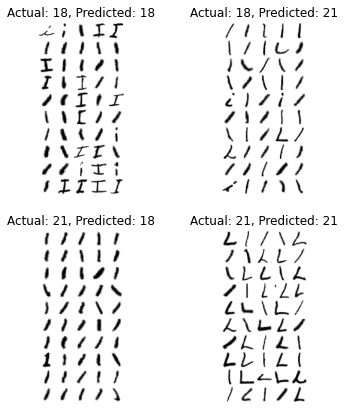

In [24]:
class_A = 18
class_B = 21
X_class_AA = X_test[(y_test == class_A) & (predict_rf_test == class_A)]
X_class_AB = X_test[(y_test == class_A) & (predict_rf_test == class_B)]
X_class_BA = X_test[(y_test == class_B) & (predict_rf_test == class_A)]
X_class_BB = X_test[(y_test == class_B) & (predict_rf_test == class_B)] 

if let_plot:
   plt.figure(figsize=(6,7))
   plt.subplot(221); plot_digits(X_class_AA[0:50], images_per_row=5)
   plt.title("Actual: " + str(class_A) + ", Predicted: " + str(class_A))
   plt.subplot(222); plot_digits(X_class_AB[0:50], images_per_row=5)
   plt.title("Actual: " + str(class_A) + ", Predicted: " + str(class_B))
   plt.subplot(223); plot_digits(X_class_BA[0:50], images_per_row=5)
   plt.title("Actual: " + str(class_B) + ", Predicted: " + str(class_A))
   plt.subplot(224); plot_digits(X_class_BB[0:50], images_per_row=5)
   plt.title("Actual: " + str(class_B) + ", Predicted: " + str(class_B))
   plt.show()


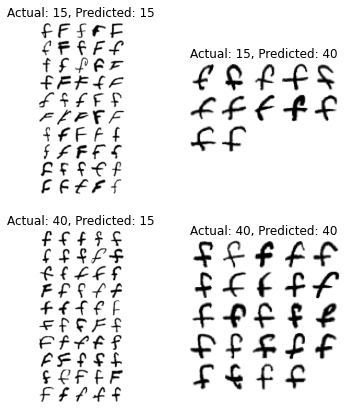

In [12]:
class_A = 15
class_B = 40
X_class_AA = X_test[(y_test == class_A) & (predict_rf_test == class_A)]
X_class_AB = X_test[(y_test == class_A) & (predict_rf_test == class_B)]
X_class_BA = X_test[(y_test == class_B) & (predict_rf_test == class_A)]
X_class_BB = X_test[(y_test == class_B) & (predict_rf_test == class_B)] 

if let_plot:
   plt.figure(figsize=(6,7))
   plt.subplot(221); plot_digits(X_class_AA[0:50], images_per_row=5)
   plt.title("Actual: " + str(class_A) + ", Predicted: " + str(class_A))
   plt.subplot(222); plot_digits(X_class_AB[0:50], images_per_row=5)
   plt.title("Actual: " + str(class_A) + ", Predicted: " + str(class_B))
   plt.subplot(223); plot_digits(X_class_BA[0:50], images_per_row=5)
   plt.title("Actual: " + str(class_B) + ", Predicted: " + str(class_A))
   plt.subplot(224); plot_digits(X_class_BB[0:50], images_per_row=5)
   plt.title("Actual: " + str(class_B) + ", Predicted: " + str(class_B))
   plt.show()

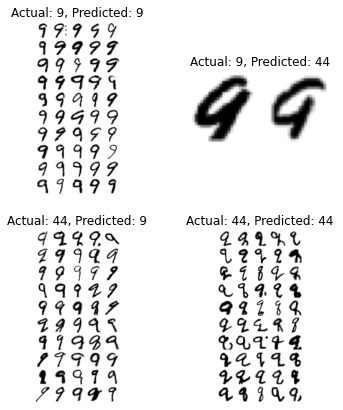

In [19]:
class_A = 9
class_B = 44
X_class_AA = X_test[(y_test == class_A) & (predict_rf_test == class_A)]
X_class_AB = X_test[(y_test == class_A) & (predict_rf_test == class_B)]
X_class_BA = X_test[(y_test == class_B) & (predict_rf_test == class_A)]
X_class_BB = X_test[(y_test == class_B) & (predict_rf_test == class_B)] 

if let_plot:
   plt.figure(figsize=(6,7))
   plt.subplot(221); plot_digits(X_class_AA[0:50], images_per_row=5)
   plt.title("Actual: " + str(class_A) + ", Predicted: " + str(class_A))
   plt.subplot(222); plot_digits(X_class_AB[0:50], images_per_row=5)
   plt.title("Actual: " + str(class_A) + ", Predicted: " + str(class_B))
   plt.subplot(223); plot_digits(X_class_BA[0:50], images_per_row=5)
   plt.title("Actual: " + str(class_B) + ", Predicted: " + str(class_A))
   plt.subplot(224); plot_digits(X_class_BB[0:50], images_per_row=5)
   plt.title("Actual: " + str(class_B) + ", Predicted: " + str(class_B))
   plt.show()
